In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
%matplotlib inline

In [2]:
def find_fraction_of_good_Ev( sample=None, good_percentage=15 ):
    Ngood = len(sample[np.abs(sample)<good_percentage])
    fgood = float(Ngood) / len(sample)
    print "%.1f"%(100.*fgood),'% with ratio<',good_percentage,'%'
    return fgood

# 7 Reconstruction of the incoming Eν for the selected events
Aug 30, 2017

In [3]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/EvReconstruction/'

# pairs of tracks at close proximity

In [4]:
pairsFV, MCsamples = load_pairs_as_samples()
pur_eff,pur_eff_numbers = apply_cuts()

50939 pairs from MC-BNB + cosmic DATA overlay
30377 pairs in FV
3814 are 1mu-1p, 12.6%
4001 are other pairs, 13.2%
22562 are cosmic, 74.3%
--------------------------------------------------------------
1234 are CC 1p 0pi, 4.1%


In [5]:
pur_eff

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,12.6%,100.0%,4.1%,100.0% (3814),100.0% (4001),100.0% (22562),100.0% (1234)
${PID}_A$,93.6%,32.0%,92.5%,10.2%,93.6% (3569),58.3% (2333),23.3% (5261),92.5% (1141)
$l_{\mu}>l_{p}$,74.4%,47.1%,77.2%,15.8%,74.4% (2838),28.7% (1149),9.0% (2034),77.2% (953)
"$|\theta_{1,2}-90^0|<60^0$",68.1%,66.6%,74.3%,23.5%,68.1% (2599),18.4% (736),2.5% (569),74.3% (917)
vertex $\Delta Q$,45.2%,69.1%,61.2%,30.3%,45.2% (1724),10.4% (418),1.6% (352),61.2% (755)
$|\Delta \phi - \pi|<40^{0}$,29.5%,76.8%,53.6%,45.1%,29.5% (1126),3.3% (134),0.9% (207),53.6% (662)
$\theta_{pq}<25$,22.3%,90.6%,45.6%,60.0%,22.3% (850),1.5% (62),0.1% (26),45.6% (563)
$p_{t}<0.35$,24.6%,86.1%,48.1%,54.4%,24.6% (939),1.8% (73),0.4% (79),48.1% (594)
$p_{t}<0.15$,12.4%,94.4%,27.5%,67.5%,12.4% (474),0.4% (18),0.0% (10),27.5% (339)


## 7.I Calorimetric reconstruction of the incoming neutrino energy

20.0 % with ratio< 8 %
25.6 % with ratio< 8 %
31.3 % with ratio< 8 %
49.4 % with ratio< 8 %


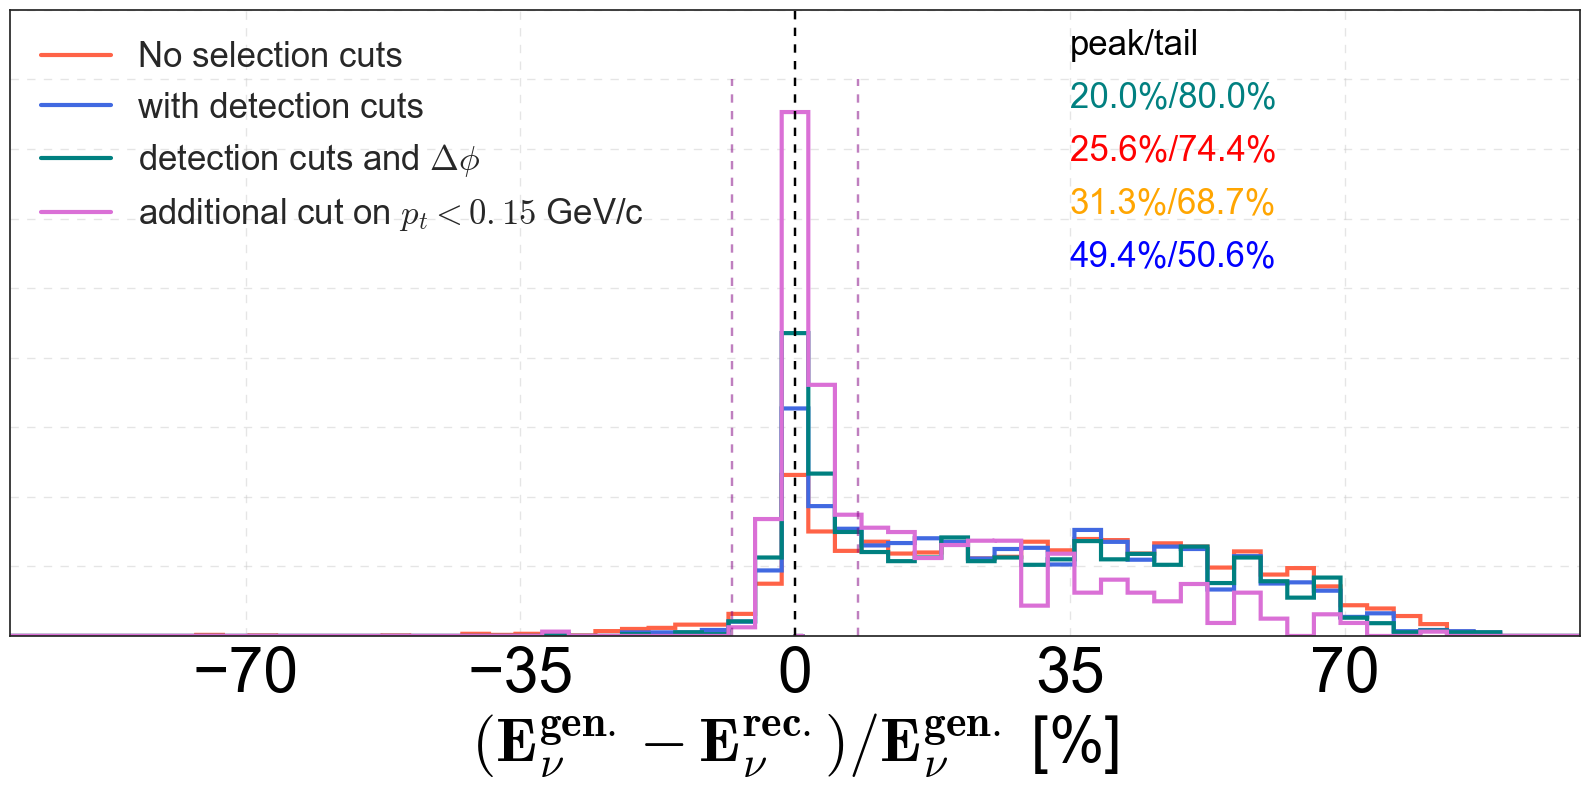

In [6]:
# Ev before and after the cuts
good_percentage = 8 # above 10% we consider bad Ev reconstruction
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-100,100,60)
fgood_arr = []
cuts   = ['no cut','vertex $\Delta Q$', '$|\Delta \phi - \pi|<40^{0}$' , '$p_{t}<0.15$' ]                                
cut_labels = ['No selection cuts','with detection cuts','detection cuts and $\\Delta \\phi$', 'additional cut on $p_{t}<0.15$ GeV/c']
cut_colors = ['tomato','royalblue','teal','Orchid']
for cut_name,label,color in zip(cuts,cut_labels,cut_colors):
    sample = reduced_MCsamples[cut_name]['1mu-1p']
    ratio = 100*(sample['closest_genie_Ev'] - sample['reco_Ev'])/sample['closest_genie_Ev']
    h,bins,_=plt.hist( ratio , bins=bins, histtype='step',linewidth=3,normed=1,color=color);
    plt.plot([0,0],'-',color=color,label=label,linewidth=3)
    fgood_arr.append(100.*find_fraction_of_good_Ev( sample=ratio, good_percentage=good_percentage ))

plt.text( 35 , 0.95*np.max(ax.get_ylim())*(1.1) , 'peak/tail' , fontsize=25 , color='black' )
for i,fgood,color in zip(range(len(fgood_arr)),fgood_arr,colors):    
    plt.text( 35 , 0.95*np.max(ax.get_ylim())*(1-0.1*i) , '%.1f'%fgood+'%'+'/%.1f'%(100-fgood)+'%'  , fontsize=25 , color=color )
ax.plot([good_percentage,good_percentage],ax.get_ylim(),'--',[-good_percentage,-good_percentage],ax.get_ylim(),'--',color='purple',alpha=0.5)
ax.grid(linestyle='--',alpha=0.5)
# ax.set_title('all $\\mu p$ pairs',fontsize=25,y=1.02)
ax.legend(loc='upper left',fontsize=25)
plt.plot([0,0],ax.get_ylim(),'--',color='black')
set_axes(ax,'$\\bf{(E^{gen.}_{\\nu}-E^{rec.}_{\\nu})/E^{gen.}_{\\nu}}$ [%]',ticks_color='black',fontsize=45)
ax.xaxis.set_ticks([-70,-35,0,35,70]);
# ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
fig.savefig(figures_path+'EvReconstructed.pdf')

## 7.III Reconstructed pt

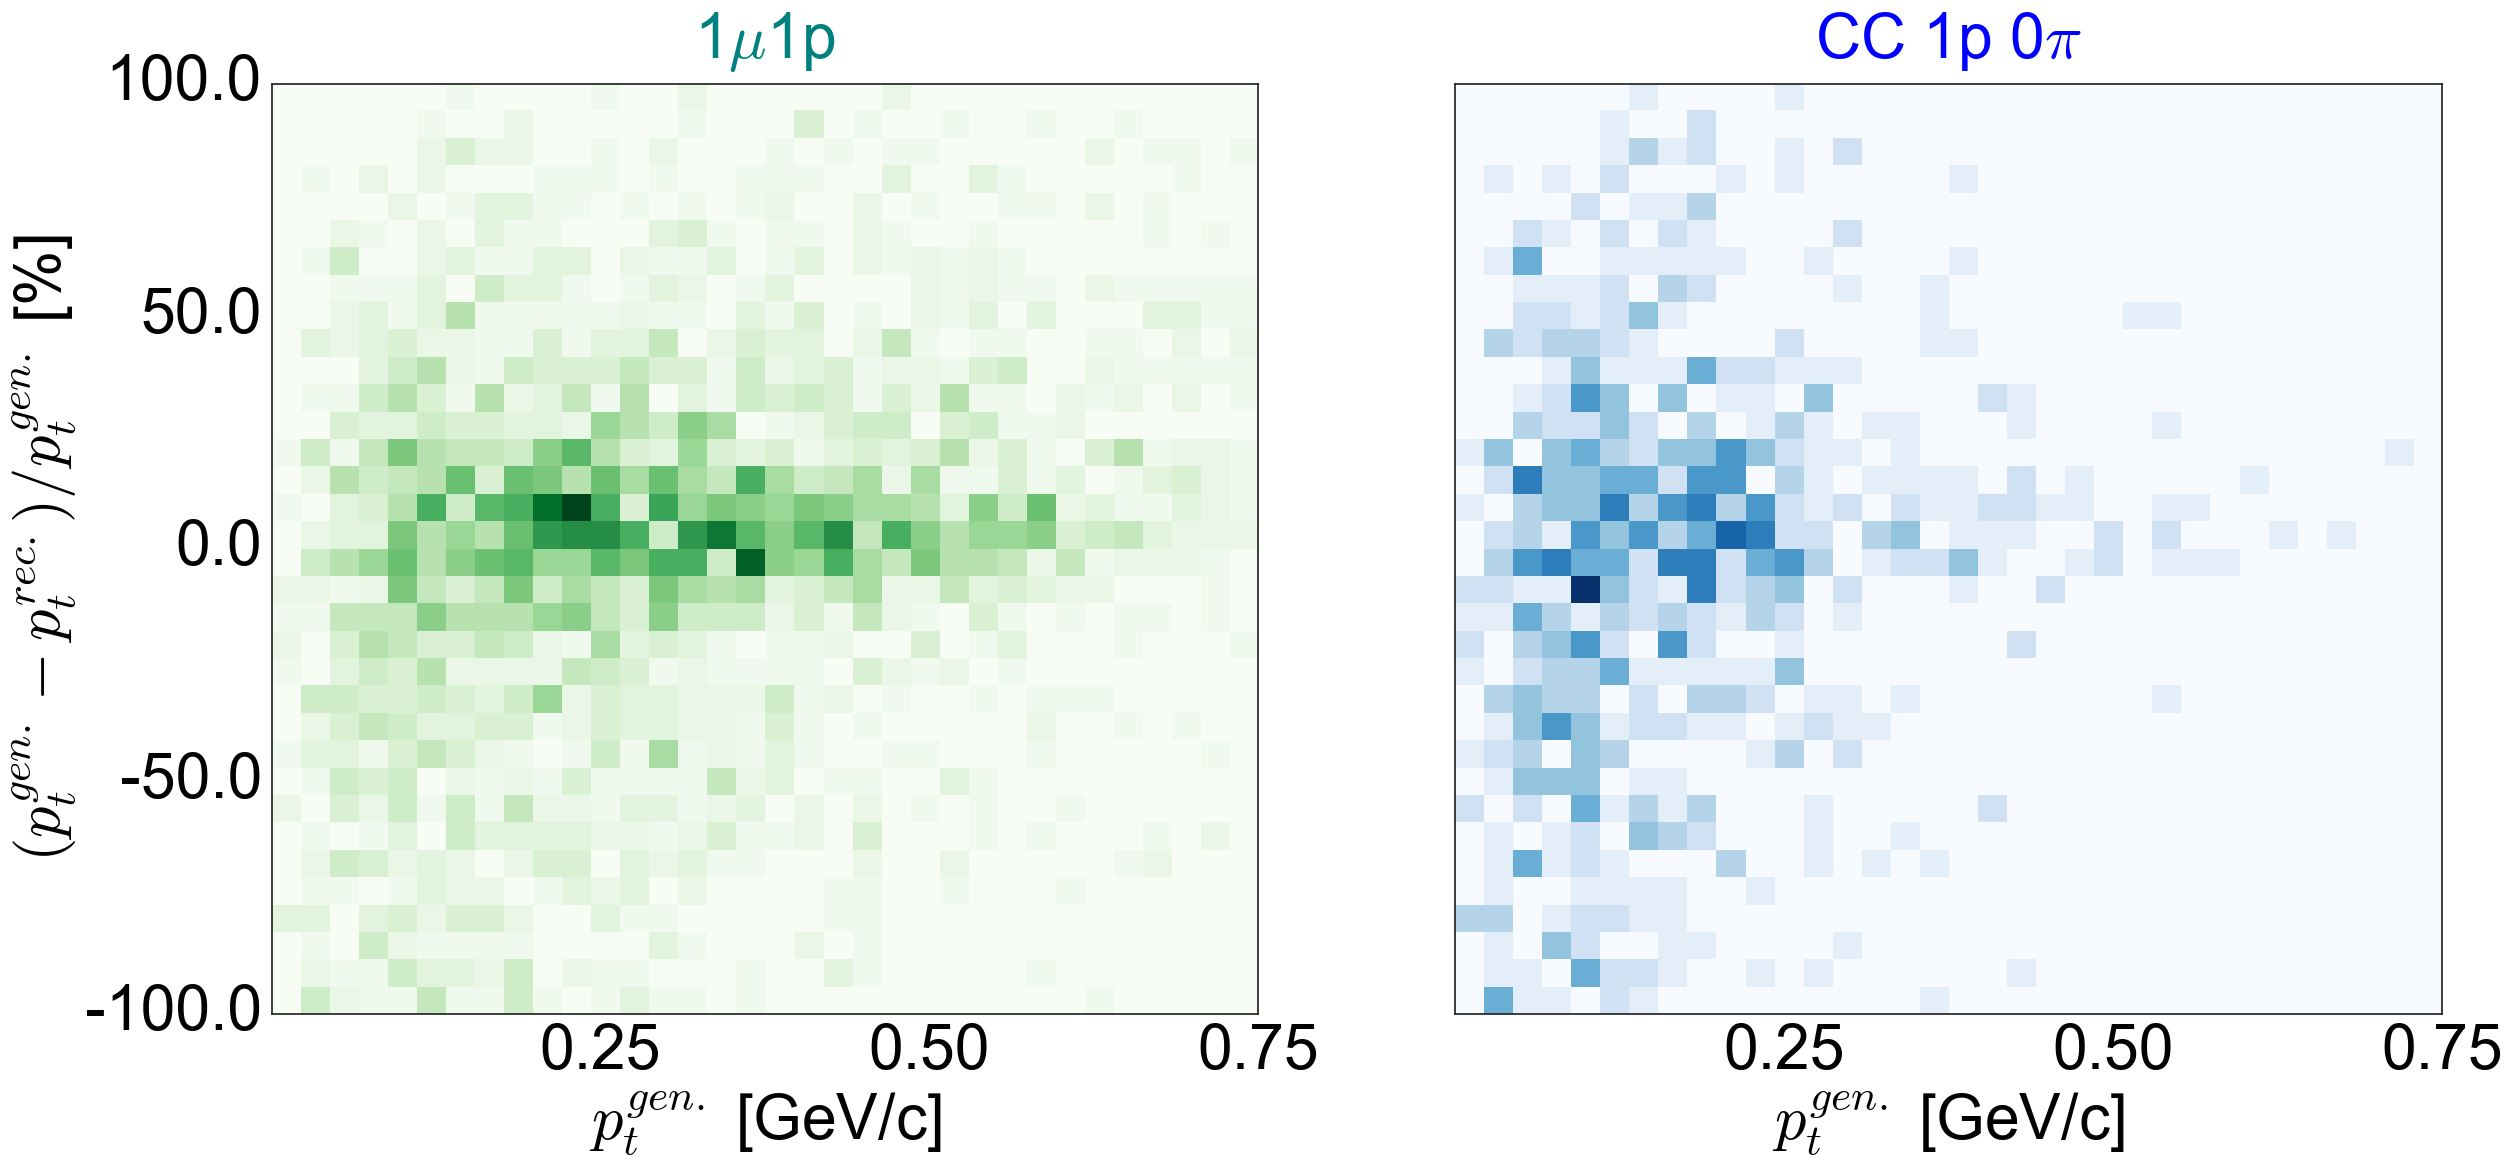

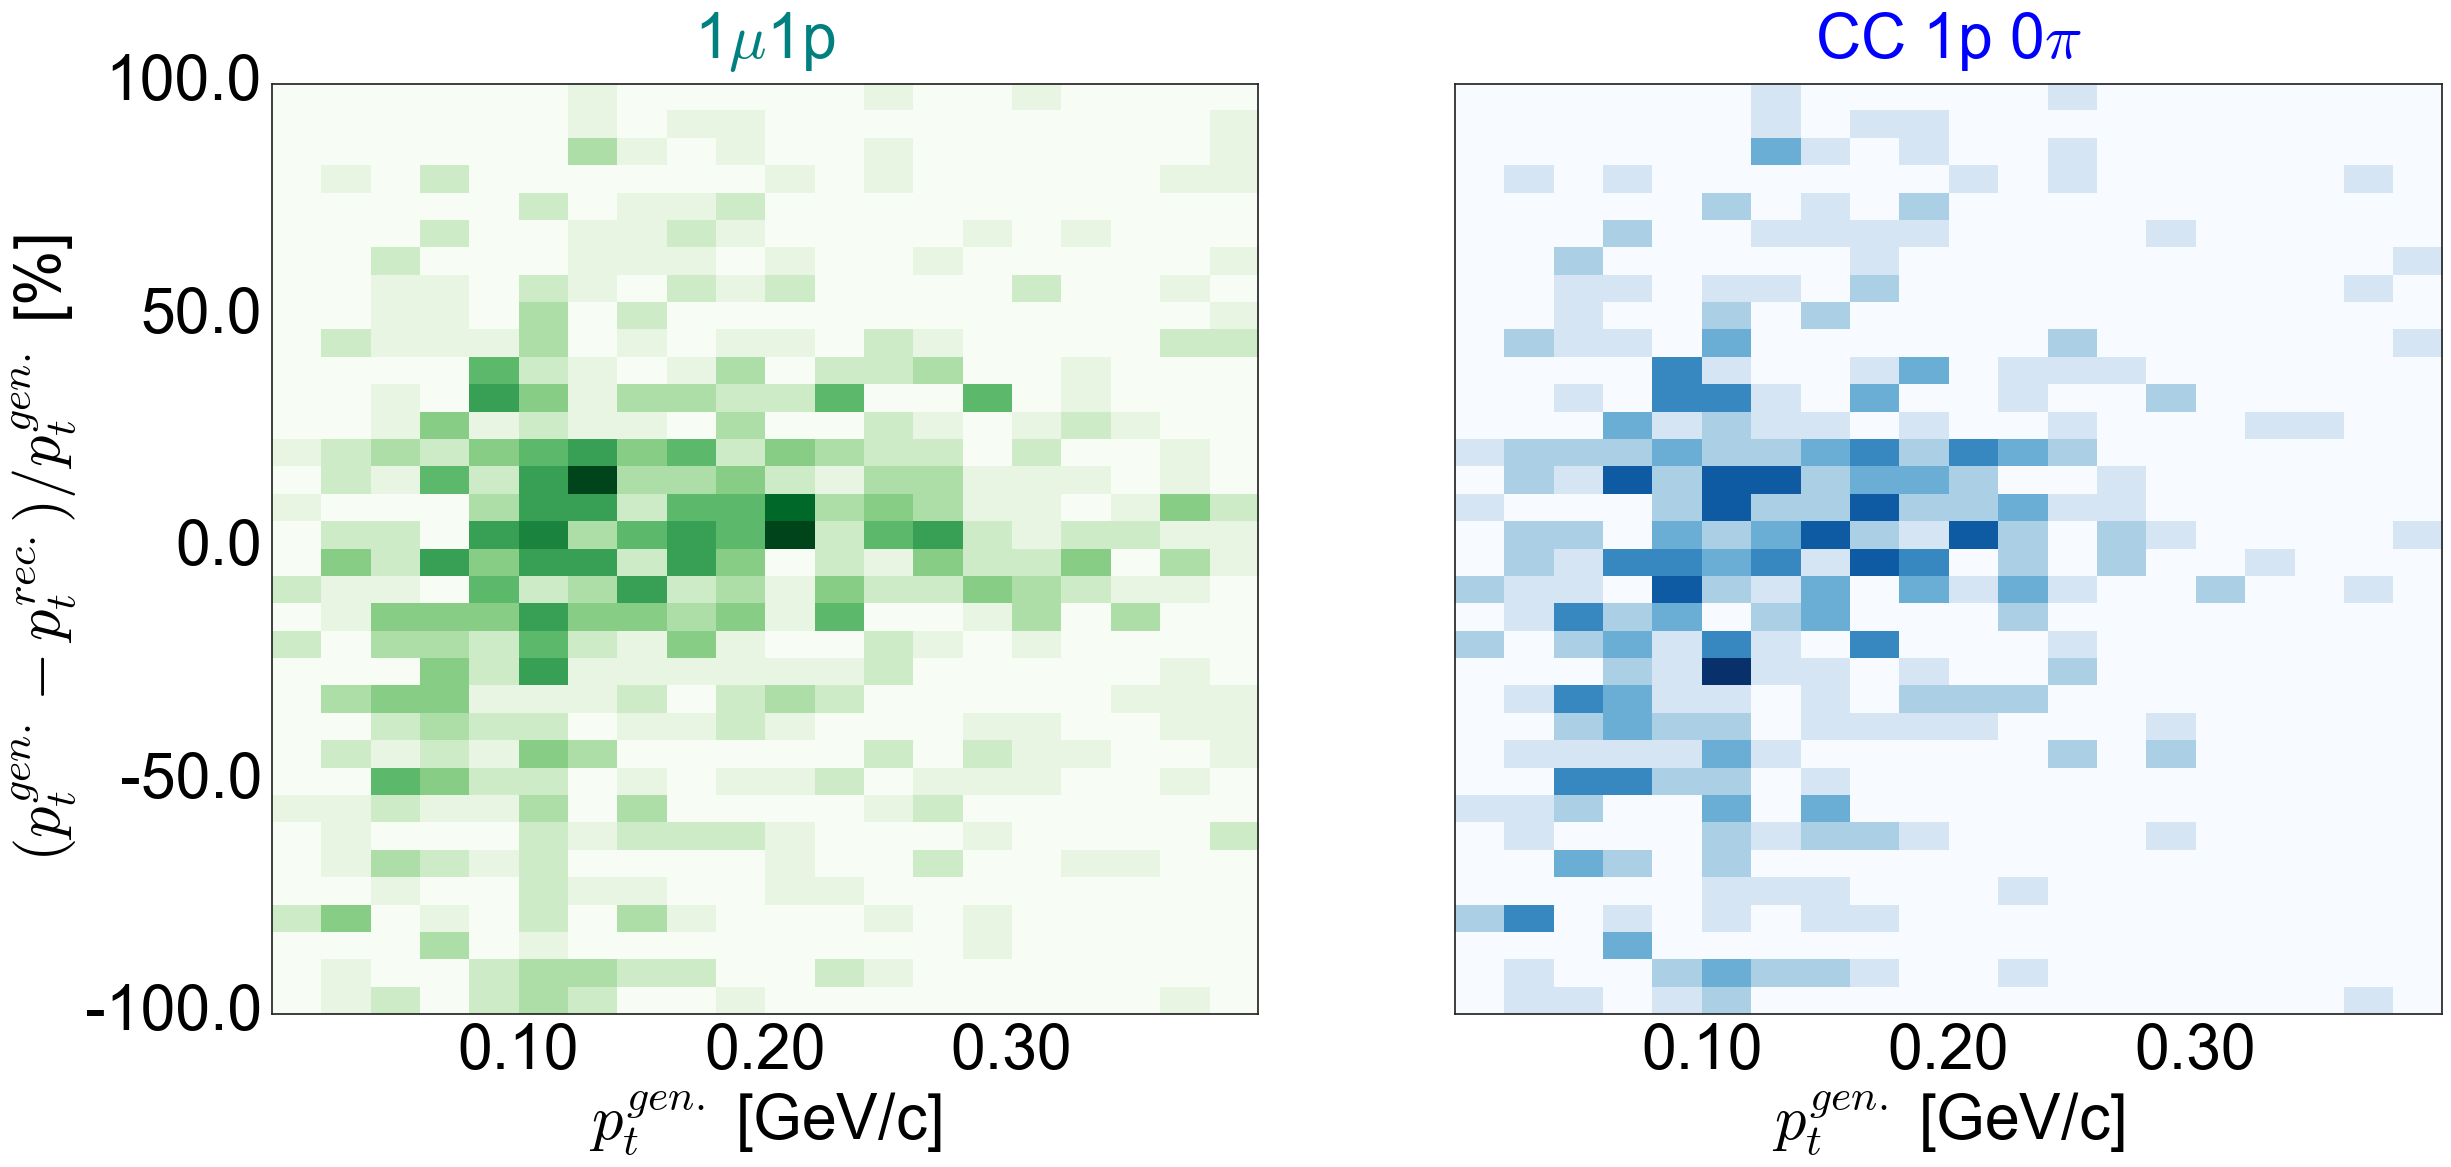

In [7]:
fig = plt.figure(figsize=(28,12))
bins=(np.linspace(0,0.75,35),np.linspace(-100,100,35))
    
for i,index in enumerate([0,3]):
    pair_type = pair_types[index]
    label = labels[index]; cmap = cmaps[index]; color = colors[index]
    sample = reduced_MCsamples['no cut'][pair_type]    
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['truth_Pt'], 
                 100.*(sample['truth_Pt']-sample['reco_Pt'])/sample['truth_Pt'],
                 ax=ax,fontsize=30,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label='$p_{t}^{gen.}$ [GeV/c]', y_label='$(p_{t}^{gen.}-p_{t}^{rec.})/p_{t}^{gen.}$ [%]' if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([0.25,0.5,0.75])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    

fig.savefig(figures_path+'Pt_reconstruction.pdf')

bins=(np.linspace(0,0.4,21),np.linspace(-100,100,35))
fig = plt.figure(figsize=(28,12))
for i,index in enumerate([0,3]):
    pair_type = pair_types[index]
    label = labels[index]; cmap = cmaps[index]; color = colors[index]
    sample = reduced_MCsamples['$|\Delta \phi - \pi|<40^{0}$'][pair_type]    
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['truth_Pt'], 
                 100.*(sample['truth_Pt']-sample['reco_Pt'])/sample['truth_Pt'],
                 ax=ax,fontsize=30,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label='$p_{t}^{gen.}$ [GeV/c]', y_label='$(p_{t}^{gen.}-p_{t}^{rec.})/p_{t}^{gen.}$ [%]' if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([0.1,0.2,0.3])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
fig.savefig(figures_path+'Pt_reconstruction_after_cut_DeltaPhi.pdf')

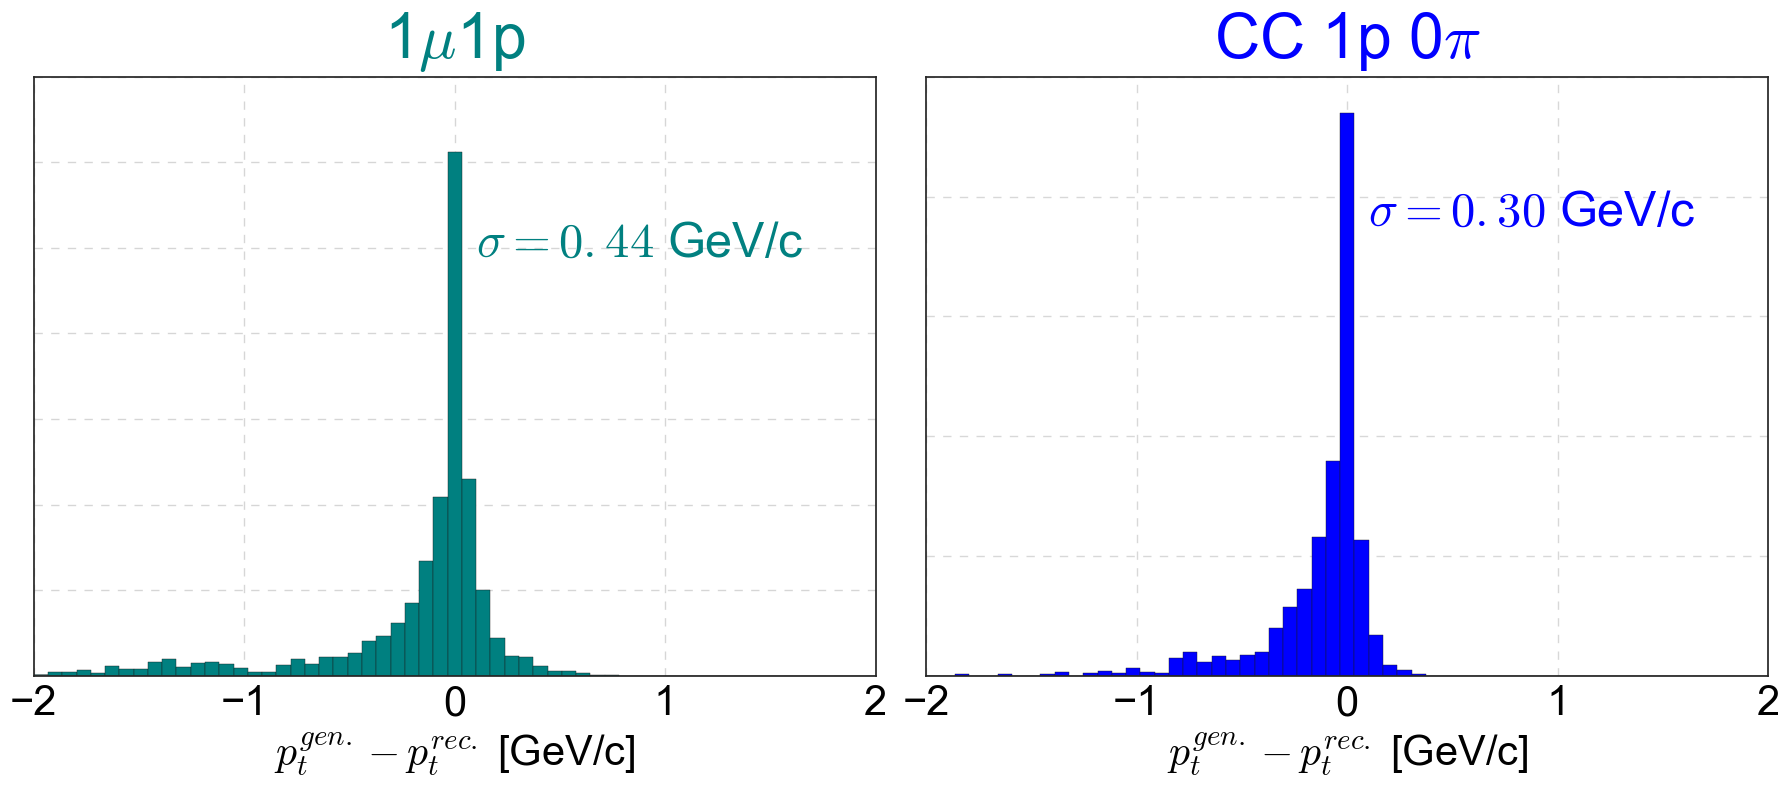

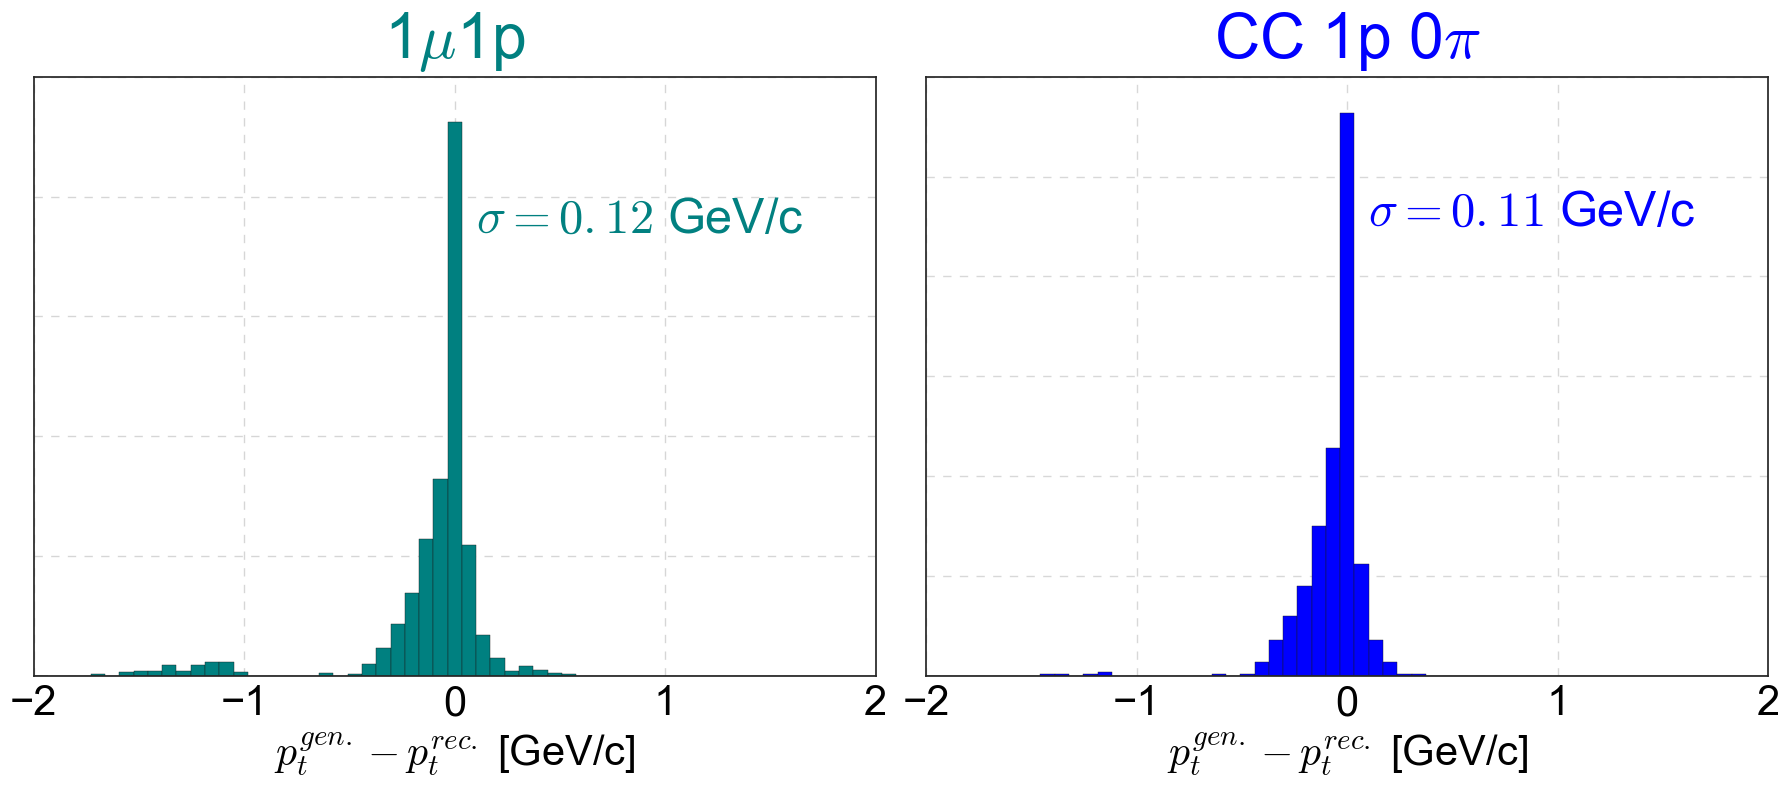

In [8]:
fig=plt.figure(figsize=(18,8))
for i,index in enumerate([0,3]):
    pair_type = pair_types[index]
    label = labels[index]; cmap = cmaps[index]; color = colors[index]
    sample = reduced_MCsamples['no cut'][pair_type]    
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    h,bins,_=ax.hist(sample['truth_Pt']-sample['reco_Pt'],bins=np.linspace(-2,2,60),color=color);
    ax.yaxis.set_major_formatter(ticker.NullFormatter())    
    set_axes(ax,'$p_{t}^{gen.}-p_{t}^{rec.}$ [GeV/c]' , '', fontsize=30,do_add_grid=True ,xticks=[-2,-1,0,1,2])
    small_sample = sample[np.abs(sample['truth_Pt']-sample['reco_Pt'])<10]
    sigma = np.std(small_sample['truth_Pt']-small_sample['reco_Pt'])
    plt.text(0.1,0.8*np.max(h),'$\\sigma=%.2f$'%sigma+' GeV/c',color=color,fontsize=35)
ax.grid(linestyle='--',alpha=0.75)
plt.tight_layout()
fig.savefig(figures_path+'Pt_gen_reco.pdf')


fig=plt.figure(figsize=(18,8))
for i,index in enumerate([0,3]):
    pair_type = pair_types[index]
    label = labels[index]; cmap = cmaps[index]; color = colors[index]
    sample = reduced_MCsamples['$|\Delta \phi - \pi|<40^{0}$'][pair_type]    
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    h,bins,_=ax.hist(sample['truth_Pt']-sample['reco_Pt'],bins=np.linspace(-2,2,60),color=color);
    ax.yaxis.set_major_formatter(ticker.NullFormatter())    
    set_axes(ax,'$p_{t}^{gen.}-p_{t}^{rec.}$ [GeV/c]' , '', fontsize=30,do_add_grid=True ,xticks=[-2,-1,0,1,2])
    small_sample = sample[np.abs(sample['truth_Pt']-sample['reco_Pt'])<0.5]
    sigma = np.std(small_sample['truth_Pt']-small_sample['reco_Pt'])
    plt.text(0.1,0.8*np.max(h),'$\\sigma=%.2f$'%sigma+' GeV/c',color=color,fontsize=35)
ax.grid(linestyle='--',alpha=0.75)
plt.tight_layout()
fig.savefig(figures_path+'Pt_gen_reco_after_cut_DeltaPhi.pdf')

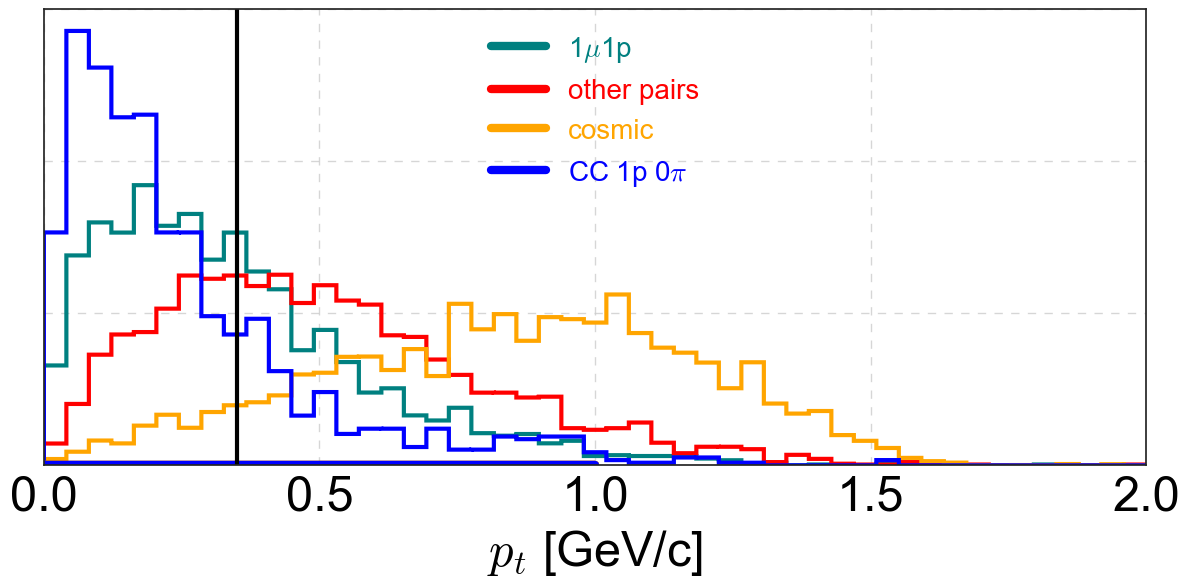

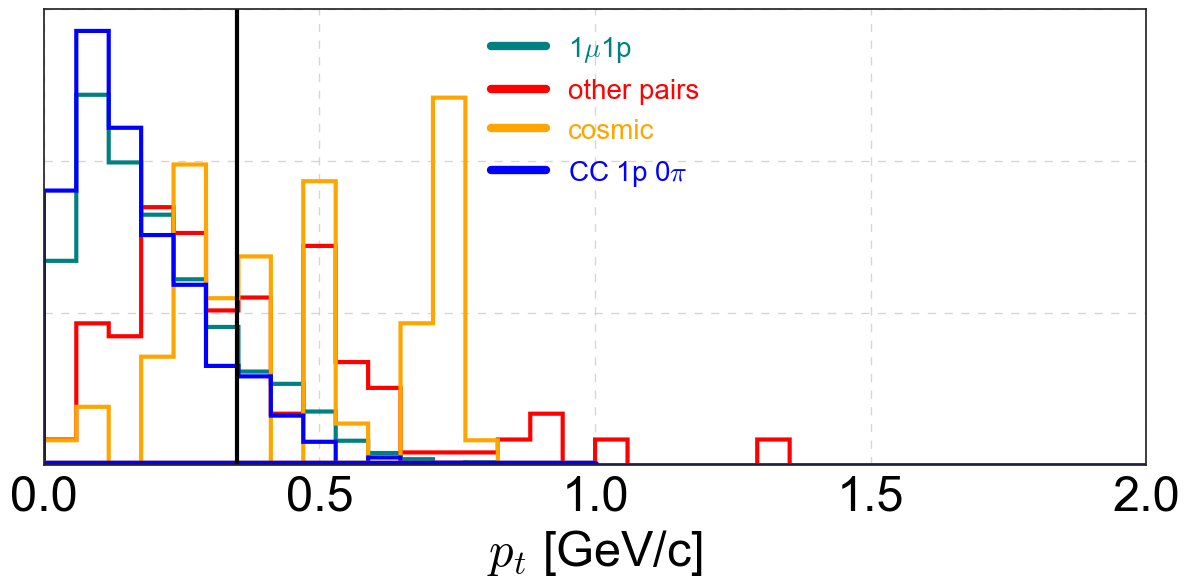

In [9]:
ax=plot_feature_pairs(cut_name='no cut',var='reco_Pt',x_label='$p_{t}$ [GeV/c]'
                              ,bins=np.linspace(0,2,50)
                              ,do_add_legend=True,figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
ax.plot([0.35,0.35],ax.get_ylim(),'-',color='black',linewidth=3)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.tight_layout()
plt.savefig(figures_path+'Pt.pdf')

# after cut 5
ax=plot_feature_pairs(cut_name='$|\Delta \phi - \pi|<40^{0}$',var='reco_Pt',x_label='$p_{t}$ [GeV/c]'
                              ,bins=np.linspace(0,2,35)
                              ,do_add_legend=True,figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.plot([0.35,0.35],ax.get_ylim(),'-',color='black',linewidth=3)
plt.tight_layout()
plt.savefig(figures_path+'Pt_after_cut_DeltaPhi.pdf')

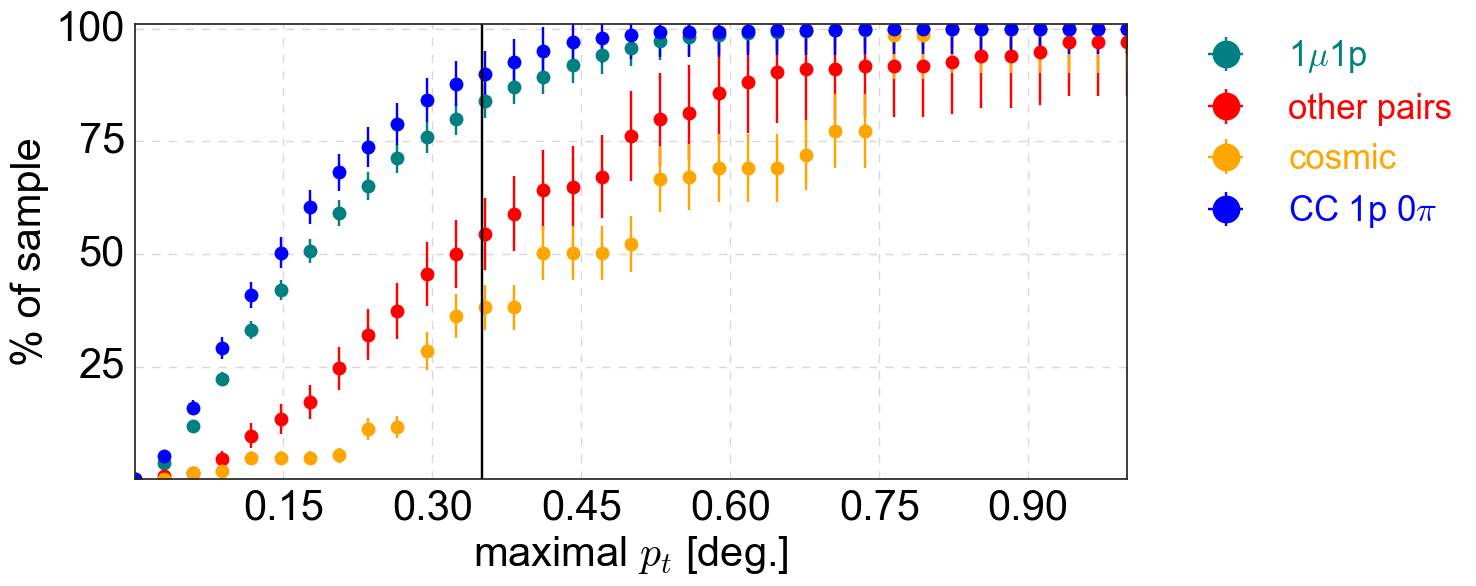

In [10]:
ax,leg=plot_cut_samples(reduced_cut_name='$|\Delta \phi - \pi|<40^{0}$',do_add_legend=True,legend_fontsize=25,markers_size=10               
                     ,cut_var ='reco_Pt', cut_type= 'max',ticks_color='black'                 
                     ,x_label = 'maximal $p_{t}$ [deg.]'
                     ,xmin=0, xmax=1. , Nbins=35,fontsize=30,figsize=(12,6));
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax.set_xticks([0.15,0.3,0.45,0.6,0.75,0.9])
plt.plot([0.35,0.35],ax.get_ylim(),'-',color='black')
plt.savefig(figures_path+'Pt_cuts.pdf',bbox_extra_artists=(leg,), bbox_inches='tight')

### E$\nu$ in bins of $p_t$ 

In [11]:

bins_labels = ['$p_{t}<0.15$ GeV/c','$0.15<p_{t}<0.25$ GeV/c','$0.25$ GeV/c $<p_{t}$']
bins_colors = ['tomato','royalblue','teal']



39.2 % with ratio< 8 %
18.4 % with ratio< 8 %
13.4 % with ratio< 8 %


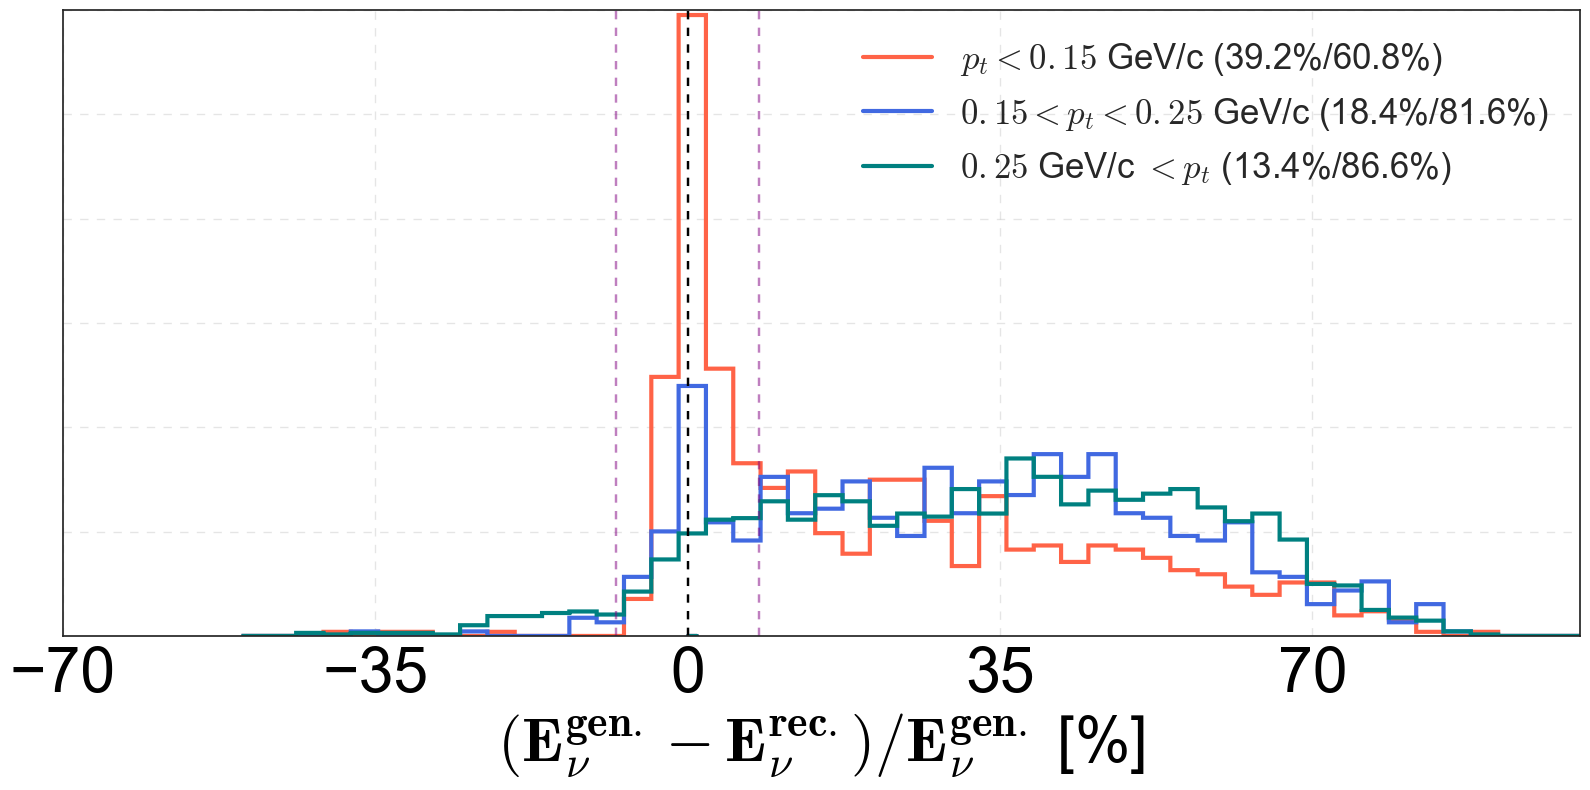

In [12]:
# In Pt bins after cuts
good_percentage = 8 # above 10% we consider bad Ev reconstruction
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-50,100,50)
PtBins = [[0,0.1],[0.1,0.2],[0.2,1.0]]
mu_p =  reduced_MCsamples['no cut']['1mu-1p']
cuts_s = [mu_p[mu_p['reco_Pt']<0.15],mu_p[(mu_p['reco_Pt']>0.15)&(mu_p['reco_Pt']<0.25)],mu_p[mu_p['reco_Pt']>0.25]]                                

fgood_arr = []
for sample,label,color in zip(cuts_s,bins_labels,bins_colors):
    ratio = 100*(sample['closest_genie_Ev'] - sample['reco_Ev'])/sample['closest_genie_Ev']
    plt.hist( ratio , bins=bins, histtype='step',linewidth=3,normed=1,color=color);
    fgood_arr.append(100.*find_fraction_of_good_Ev( sample=ratio, good_percentage=good_percentage ))
    text = '%.1f'%fgood_arr[-1]+'%'+'/%.1f'%(100-fgood_arr[-1])+'%'
    plt.plot([0,0],'-',color=color,label=label+' ('+text+')',linewidth=3)
ax.plot([good_percentage,good_percentage],ax.get_ylim(),'--',[-good_percentage,-good_percentage],ax.get_ylim(),'--',color='purple',alpha=0.5)
ax.grid(linestyle='--',alpha=0.5)
ax.legend(loc='upper right',fontsize=25)
plt.plot([0,0],ax.get_ylim(),'--',color='black')
set_axes(ax,'$\\bf{(E^{gen.}_{\\nu}-E^{rec.}_{\\nu})/E^{gen.}_{\\nu}}$ [%]',ticks_color='black',fontsize=45,nticklabels=4)
ax.xaxis.set_ticks([-70,-35,0,35,70]);
ax.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
plt.savefig(figures_path+'EvReconstructedBinsPt.pdf')

49.0 % with ratio< 8 %
27.4 % with ratio< 8 %
11.0 % with ratio< 8 %


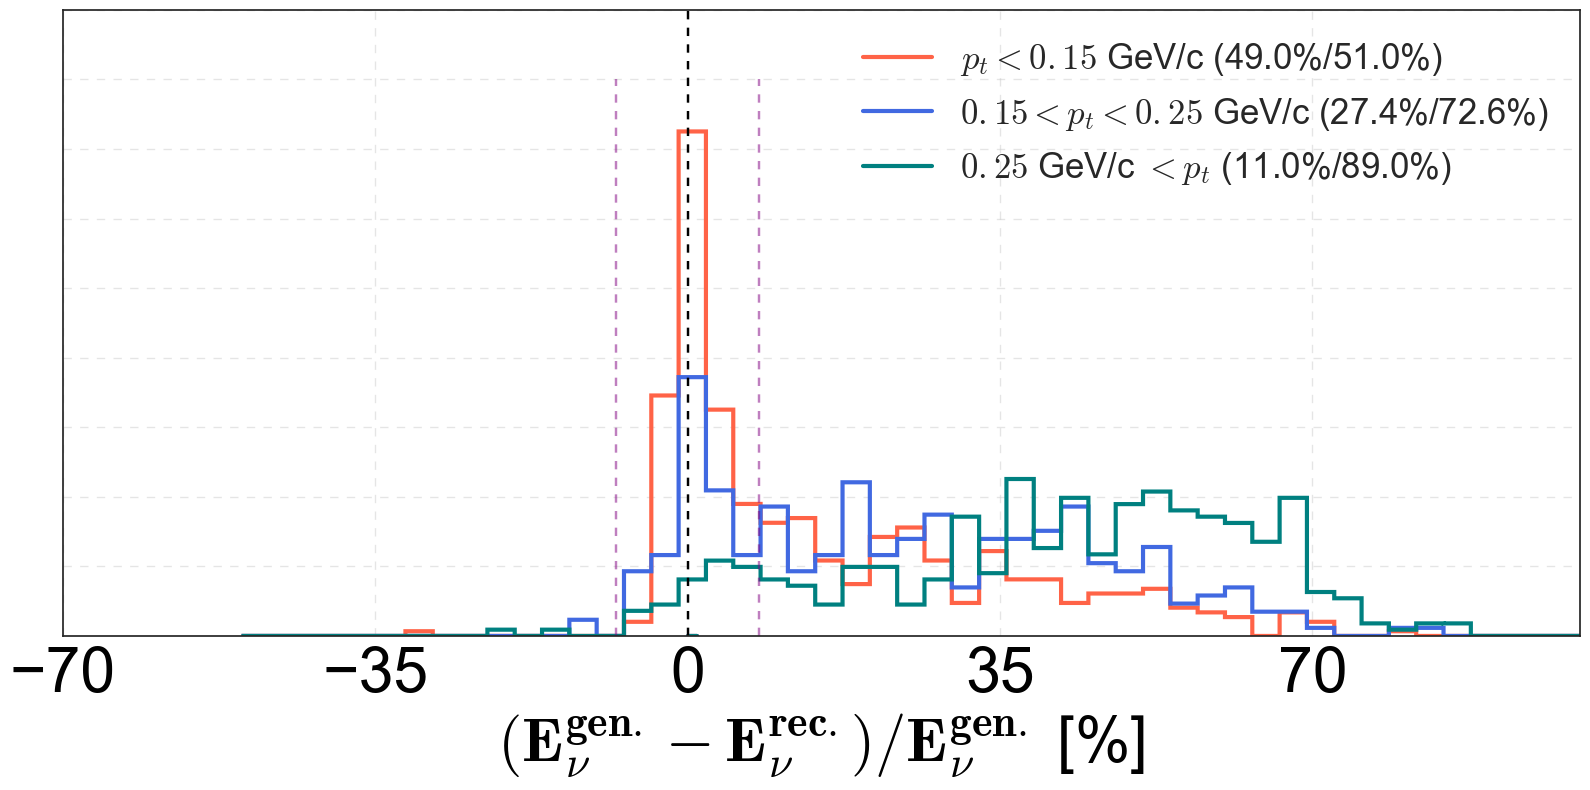

In [13]:

# In Pt bins after cuts
good_percentage = 8 # above 10% we consider bad Ev reconstruction
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-50,100,50)
PtBins = [[0,0.1],[0.1,0.2],[0.2,1.0]]
mu_p =  reduced_MCsamples['$|\Delta \phi - \pi|<40^{0}$']['1mu-1p']
cuts_s = [mu_p[mu_p['reco_Pt']<0.15],mu_p[(mu_p['reco_Pt']>0.15)&(mu_p['reco_Pt']<0.25)],mu_p[mu_p['reco_Pt']>0.25]]                                

fgood_arr = []
for sample,label,color in zip(cuts_s,bins_labels,bins_colors):
    ratio = 100*(sample['closest_genie_Ev'] - sample['reco_Ev'])/sample['closest_genie_Ev']    
    plt.hist( ratio , bins=bins, histtype='step',linewidth=3,normed=1,color=color);
    fgood_arr.append(100.*find_fraction_of_good_Ev( sample=ratio, good_percentage=good_percentage ))
    text = '%.1f'%fgood_arr[-1]+'%'+'/%.1f'%(100-fgood_arr[-1])+'%'
    plt.plot([0,0],'-',color=color,label=label+' ('+text+')',linewidth=3)

ax.plot([good_percentage,good_percentage],ax.get_ylim(),'--',[-good_percentage,-good_percentage],ax.get_ylim(),'--',color='purple',alpha=0.5)
ax.grid(linestyle='--',alpha=0.5)
ax.legend(loc='upper right',fontsize=25)
plt.plot([0,0],ax.get_ylim(),'--',color='black')
set_axes(ax,'$\\bf{(E^{gen.}_{\\nu}-E^{rec.}_{\\nu})/E^{gen.}_{\\nu}}$ [%]',ticks_color='black',fontsize=45,nticklabels=4)
ax.xaxis.set_ticks([-70,-35,0,35,70]);
ax.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
plt.savefig(figures_path+'EvReconstructedBinsPt_after_cut_DeltaPhi.pdf')

### 7.IV A tight cut on pt for better reconstructed Eν

In [14]:
pur_eff_numbers

,\CCIpOpi,\mup,cosmic,cut name,eff \CCIpOpi,eff \mup,other pairs,pur \CCIpOpi,pur \mup
no cut,1234.0,3814.0,22562.0,no cut,100.000000,100.000000,4001.0,4.062284,12.555552
\CutPIDa,1141.0,3569.0,5261.0,\CutPIDa,92.463533,93.576298,2333.0,10.221267,31.971692
\Cutlmup,953.0,2838.0,2034.0,\Cutlmup,77.228525,74.410068,1149.0,15.827936,47.135027
non-collinearity,917.0,2599.0,569.0,non-collinearity,74.311183,68.143681,736.0,23.488730,66.572746
$\Delta Q$,755.0,1724.0,352.0,$\Delta Q$,61.183144,45.201888,418.0,30.272654,69.125902
\CutDeltaPhi,662.0,1126.0,207.0,\CutDeltaPhi,53.646677,29.522811,134.0,45.126108,76.755283
$\theta_{pq}<25$,563.0,850.0,26.0,$\theta_{pq}<25$,45.623987,22.286314,62.0,60.021322,90.618337
$p_{t}<0.35$,594.0,939.0,79.0,$p_{t}<0.35$,48.136143,24.619822,73.0,54.445463,86.067828
$p_{t}<0.15$,339.0,474.0,10.0,$p_{t}<0.15$,27.471637,12.427897,18.0,67.529880,94.422311


In [17]:
# plug in table tab:FurtherCutOnPt in report (ReconstructionOfEvForTheSelectedEvents.tex)
print " plug in table tab:FurtherCutOnPt in report (ReconstructionOfEvForTheSelectedEvents.tex)"
print 
print "			\hline"
print "			cut	 					& \\textcolor{orange}{cosmic}		& \\textcolor{red}{other pairs} 		& \\textcolor{teal}{\mup} 		& \\textcolor{blue}{\CCIpOpi}  			& purity \\textcolor{teal}{\mup} (\\textcolor{blue}{\CCIpOpi}) 	& efficiency \\textcolor{teal}{\mup} (\\textcolor{blue}{\CCIpOpi}) 		\\tabularnewline"
print "\hline \hline"
for i,row in pur_eff_numbers.iterrows():
    if "theta_{pq}" in row['cut name'] or "p_{t}" in row['cut name']:
        print "			"+row['cut name']+"\
        & \\textcolor{orange}{%d"%row['cosmic']+"}\
        & \\textcolor{red}{%d"%row['other pairs']+"}\
        & \\textcolor{teal}{%d"%row['\mup']+"}\
        & \\textcolor{blue}{%d"%row['\CCIpOpi']+"}\
        & \\textcolor{teal}{%.1f"%(float(row['pur \mup']))+"\%"+"}"+"(\\textcolor{blue}{%.1f"%(float(row['pur \CCIpOpi']))+"\%"+")}\
        & \\textcolor{teal}{%.1f"%(float(row['eff \mup']))+"\%"+"}"+"(\\textcolor{blue}{%.1f"%(float(row['eff \CCIpOpi']))+"\%"+")}\
        \\tabularnewline"
        print "\hline"
print
print

 plug in table tab:FurtherCutOnPt in report (ReconstructionOfEvForTheSelectedEvents.tex)

			\hline
			cut	 					& \textcolor{orange}{cosmic}		& \textcolor{red}{other pairs} 		& \textcolor{teal}{\mup} 		& \textcolor{blue}{\CCIpOpi}  			& purity \textcolor{teal}{\mup} (\textcolor{blue}{\CCIpOpi}) 	& efficiency \textcolor{teal}{\mup} (\textcolor{blue}{\CCIpOpi}) 		\tabularnewline
\hline \hline
			$\theta_{pq}<25$        & \textcolor{orange}{26}        & \textcolor{red}{62}        & \textcolor{teal}{850}        & \textcolor{blue}{563}        & \textcolor{teal}{90.6\%}(\textcolor{blue}{60.0\%)}        & \textcolor{teal}{22.3\%}(\textcolor{blue}{45.6\%)}        \tabularnewline
\hline
			$p_{t}<0.35$        & \textcolor{orange}{79}        & \textcolor{red}{73}        & \textcolor{teal}{939}        & \textcolor{blue}{594}        & \textcolor{teal}{86.1\%}(\textcolor{blue}{54.4\%)}        & \textcolor{teal}{24.6\%}(\textcolor{blue}{48.1\%)}        \tabularnewline
\hline
			$p_{t}<0.15$        